<a href="https://colab.research.google.com/github/Mlvngwe/Tugas-Mandiri-Data-Mining-Prediksi-Kelulusan-Mahasiswa/blob/main/TM_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the '/content/Dataset_Mahasiswa_Kehadiran_Aktivitas_IPK.csv' dataset by performing EDA, preprocessing, and then training and evaluating a C4.5 Decision Tree classification model. Finally, visualize the Confusion Matrix and the Decision Tree, and summarize the results.

## Import Library & Load Dataset

### Subtask:
Mengimpor library Python yang diperlukan seperti pandas, numpy, dan scikit-learn, lalu memuat file CSV '/content/Dataset_Mahasiswa_Kehadiran_Aktivitas_IPK.csv' ke dalam DataFrame pandas.


**Reasoning**:
First, I'll import pandas and numpy for data manipulation and numerical operations. Then, I'll load the dataset from the provided CSV file into a pandas DataFrame named 'df' and display its first few rows to verify successful loading and inspect its structure.



In [24]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Dataset_Mahasiswa_Kehadiran_Aktivitas_IPK.csv')

# Display the first few rows of the DataFrame
df.head()

,Nama,Jenis Kelamin,Umur,Status Menikah,Kehadiran (%),Partisipasi Diskusi (skor),Nilai Tugas (rata-rata),Aktivitas E-Learning (skor),IPK,Status Akademik
0,Anastasia Pradipta,Perempuan,24,Menikah,61,47,60,98,2.27,Lulus
1,Salman Mahendra,Perempuan,29,Menikah,88,52,95,90,2.35,Lulus
2,"Mahfud Narpati, S.Gz",Laki-laki,26,Menikah,46,71,77,97,3.30,Lulus
3,Bahuwirya Sihotang,Laki-laki,21,Belum Menikah,40,67,45,91,3.84,Lulus
4,Puti Raisa Mardhiyah,Laki-laki,30,Belum Menikah,45,57,82,94,2.30,Lulus


## Exploratory Data Analysis (EDA)

### Subtask:
Melakukan eksplorasi data awal untuk memahami struktur data, tipe data, statistik deskriptif, dan mengidentifikasi potensi masalah atau pola dalam dataset.


**Reasoning**:
To begin the Exploratory Data Analysis, I will check the basic information of the DataFrame, including data types, non-null values, and memory usage using `.info()`, and then display descriptive statistics for numerical columns using `.describe()`. After that, I will check for any missing values across all columns using `.isnull().sum()` to get a quick overview of data completeness.



In [25]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

print("\nMissing Values:")
df.isnull().sum()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nama                         1500 non-null   object 
 1   Jenis Kelamin                1500 non-null   object 
 2   Umur                         1500 non-null   int64  
 3   Status Menikah               1500 non-null   object 
 4   Kehadiran (%)                1500 non-null   int64  
 5   Partisipasi Diskusi (skor)   1500 non-null   int64  
 6   Nilai Tugas (rata-rata)      1500 non-null   int64  
 7   Aktivitas E-Learning (skor)  1500 non-null   int64  
 8   IPK                          1500 non-null   float64
 9   Status Akademik              1500 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 117.3+ KB

Descriptive Statistics:

Missing Values:


,0
Nama,0
Jenis Kelamin,0
Umur,0
Status Menikah,0
Kehadiran (%),0
Partisipasi Diskusi (skor),0
Nilai Tugas (rata-rata),0
Aktivitas E-Learning (skor),0
IPK,0
Status Akademik,0


**Reasoning**:
Based on the previous output of `df.info()`, I will identify the categorical and numerical columns. Then, I will iterate through the identified categorical columns (excluding 'Nama' as it's an identifier) to display their unique value counts and distributions, and finally, check the distribution of the target variable 'Status Akademik'.



In [26]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

print("\nDistribution of Categorical Columns:")
for col in categorical_cols:
    if col != 'Nama': # 'Nama' column is likely unique and not useful for value_counts()
        print(f"\n--- {col} ---")
        print(df[col].value_counts())

print("\n--- Distribution of Target Variable 'Status Akademik' ---")
print(df['Status Akademik'].value_counts())


Categorical Columns: ['Nama', 'Jenis Kelamin', 'Status Menikah', 'Status Akademik']
Numerical Columns: ['Umur', 'Kehadiran (%)', 'Partisipasi Diskusi (skor)', 'Nilai Tugas (rata-rata)', 'Aktivitas E-Learning (skor)', 'IPK']

Distribution of Categorical Columns:

--- Jenis Kelamin ---
Jenis Kelamin
Laki-laki    757
Perempuan    743
Name: count, dtype: int64

--- Status Menikah ---
Status Menikah
Belum Menikah    755
Menikah          745
Name: count, dtype: int64

--- Status Akademik ---
Status Akademik
Lulus    1399
Tidak     101
Name: count, dtype: int64

--- Distribution of Target Variable 'Status Akademik' ---
Status Akademik
Lulus    1399
Tidak     101
Name: count, dtype: int64


## Preprocessing Data

### Subtask:
Menangani missing values (jika ada), melakukan encoding pada fitur kategorikal menjadi numerik, dan melakukan scaling pada fitur numerik untuk mempersiapkan data untuk pelatihan model.


**Reasoning**:
I will start the preprocessing by creating a copy of the original DataFrame to avoid modifying the raw data. Then, I will drop the 'Nama' column as it is an identifier and not relevant for model training.



In [27]:
df_preprocessed = df.copy()
print("Original DataFrame head:")
print(df_preprocessed.head())

df_preprocessed = df_preprocessed.drop('Nama', axis=1)
print("\nDataFrame after dropping 'Nama' column:")
print(df_preprocessed.head())

Original DataFrame head:
                   Nama Jenis Kelamin  Umur Status Menikah  Kehadiran (%)  \
0    Anastasia Pradipta     Perempuan    24        Menikah             61   
1       Salman Mahendra     Perempuan    29        Menikah             88   
2  Mahfud Narpati, S.Gz     Laki-laki    26        Menikah             46   
3    Bahuwirya Sihotang     Laki-laki    21  Belum Menikah             40   
4  Puti Raisa Mardhiyah     Laki-laki    30  Belum Menikah             45   

   Partisipasi Diskusi (skor)  Nilai Tugas (rata-rata)  \
0                          47                       60   
1                          52                       95   
2                          71                       77   
3                          67                       45   
4                          57                       82   

   Aktivitas E-Learning (skor)   IPK Status Akademik  
0                           98  2.27           Lulus  
1                           90  2.35           Lulus 

**Reasoning**:
I will perform one-hot encoding on the 'Jenis Kelamin' and 'Status Menikah' categorical columns and then apply label encoding to the target variable 'Status Akademik' to convert them into numerical representations, as specified in the instructions.



In [28]:
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for 'Jenis Kelamin' and 'Status Menikah'
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['Jenis Kelamin', 'Status Menikah'], drop_first=True)
print("\nDataFrame after One-Hot Encoding:")
print(df_preprocessed.head())

# Label encoding for 'Status Akademik'
le = LabelEncoder()
df_preprocessed['Status Akademik'] = le.fit_transform(df_preprocessed['Status Akademik'])
print("\nDataFrame after Label Encoding 'Status Akademik':")
print(df_preprocessed.head())
print("Label mapping for 'Status Akademik':", list(le.classes_), le.transform(le.classes_))



DataFrame after One-Hot Encoding:
   Umur  Kehadiran (%)  Partisipasi Diskusi (skor)  Nilai Tugas (rata-rata)  \
0    24             61                          47                       60   
1    29             88                          52                       95   
2    26             46                          71                       77   
3    21             40                          67                       45   
4    30             45                          57                       82   

   Aktivitas E-Learning (skor)   IPK Status Akademik  Jenis Kelamin_Perempuan  \
0                           98  2.27           Lulus                     True   
1                           90  2.35           Lulus                     True   
2                           97  3.30           Lulus                    False   
3                           91  3.84           Lulus                    False   
4                           94  2.30           Lulus                    False   

   

**Reasoning**:
I will import `StandardScaler` from `sklearn.preprocessing`, identify the numerical columns that need scaling, apply the scaler to these columns, and then update the `df_preprocessed` DataFrame with the scaled values. Finally, I will display the first five rows and the `info()` of the DataFrame to verify the preprocessing steps.



In [29]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding the target variable if it's numerical after encoding)
numerical_cols_to_scale = ['Umur', 'Kehadiran (%)', 'Partisipasi Diskusi (skor)', 'Nilai Tugas (rata-rata)', 'Aktivitas E-Learning (skor)', 'IPK']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df_preprocessed[numerical_cols_to_scale] = scaler.fit_transform(df_preprocessed[numerical_cols_to_scale])

print("\nDataFrame after Scaling Numerical Features:")
print(df_preprocessed.head())

print("\nDataFrame Info after all preprocessing:")
df_preprocessed.info()


DataFrame after Scaling Numerical Features:
       Umur  Kehadiran (%)  Partisipasi Diskusi (skor)  \
0 -0.151819      -0.500891                   -1.313644   
1  1.293161       1.031985                   -1.029560   
2  0.426173      -1.352489                    0.049961   
3 -1.018808      -1.693128                   -0.177307   
4  1.582157      -1.409262                   -0.745475   

   Nilai Tugas (rata-rata)  Aktivitas E-Learning (skor)       IPK  \
0                -0.515030                     1.526399 -1.282015   
1                 1.504469                     1.078293 -1.141765   
2                 0.465870                     1.470386  0.523706   
3                -1.380530                     1.134306  1.470394   
4                 0.754370                     1.302346 -1.229421   

   Status Akademik  Jenis Kelamin_Perempuan  Status Menikah_Menikah  
0                0                     True                    True  
1                0                     True        

## Data Preparation & Split Data Train/Test

### Subtask:
Mempersiapkan fitur (X) dan variabel target (y) dari dataset yang telah diproses, kemudian membagi data menjadi set pelatihan dan pengujian.


**Reasoning**:
First, I will convert the boolean columns to integers (0 or 1) as some models might not handle boolean types directly. Then, I will separate the features (X) from the target variable (y), which is 'Status Akademik'. Finally, I will split the data into training and testing sets using `train_test_split` with a 80/20 ratio, ensuring reproducibility with `random_state=42` and maintaining class distribution with `stratify=y`.



In [30]:
from sklearn.model_selection import train_test_split

# Convert boolean columns to int (0 or 1)
df_preprocessed['Jenis Kelamin_Perempuan'] = df_preprocessed['Jenis Kelamin_Perempuan'].astype(int)
df_preprocessed['Status Menikah_Menikah'] = df_preprocessed['Status Menikah_Menikah'].astype(int)

# Separate features (X) and target variable (y)
X = df_preprocessed.drop('Status Akademik', axis=1)
y = df_preprocessed['Status Akademik']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of target variable in original dataset:\n", y.value_counts(normalize=True))
print("\nDistribution of target variable in training set:\n", y_train.value_counts(normalize=True))
print("\nDistribution of target variable in testing set:\n", y_test.value_counts(normalize=True))

Shape of X_train: (1200, 8)
Shape of X_test: (300, 8)
Shape of y_train: (1200,)
Shape of y_test: (300,)

Distribution of target variable in original dataset:
 Status Akademik
0    0.932667
1    0.067333
Name: proportion, dtype: float64

Distribution of target variable in training set:
 Status Akademik
0    0.9325
1    0.0675
Name: proportion, dtype: float64

Distribution of target variable in testing set:
 Status Akademik
0    0.933333
1    0.066667
Name: proportion, dtype: float64


## Model Training (Algoritma C4.5)

### Subtask:
Melatih model klasifikasi Decision Tree (C4.5) menggunakan data pelatihan. Pastikan untuk mencetak parameter model jika diperlukan.


**Reasoning**:
I will import `DecisionTreeClassifier` from `sklearn.tree`, initialize it with `criterion='entropy'` and `random_state=42` to simulate C4.5, train the model using `X_train` and `y_train`, and then print the model's parameters for verification.



In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize DecisionTreeClassifier with criterion='entropy' for C4.5 and random_state for reproducibility
dtree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the Decision Tree model
dtree_model.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully!")
print("Model Parameters:")
print(dtree_model.get_params())

Decision Tree Model Trained Successfully!
Model Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


## Evaluasi Model

### Subtask:
Mengevaluasi kinerja model yang telah dilatih menggunakan data pengujian. Menghitung dan mencetak metrik evaluasi seperti akurasi, presisi, recall, dan F1-score.


**Reasoning**:
I will import the necessary classification metrics from `sklearn.metrics`, use the trained `dtree_model` to make predictions on the test set `X_test`, and then calculate and print the accuracy, precision, recall, and F1-score of the model.



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = dtree_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Model Recall: {recall:.4f}")
print(f"Model F1-score: {f1:.4f}")

Model Accuracy: 0.9200
Model Precision: 0.4286
Model Recall: 0.6000
Model F1-score: 0.5000


## Visualisasi Confusion Matrix

### Subtask:
Membuat dan memvisualisasikan Confusion Matrix untuk melihat kinerja klasifikasi model secara detail. Pastikan untuk menyertakan label yang jelas.


**Reasoning**:
I will import necessary libraries, calculate the confusion matrix using `y_test` and `y_pred`, create a `ConfusionMatrixDisplay` object with class labels, plot it with a title, and display the plot to visualize the model's performance.



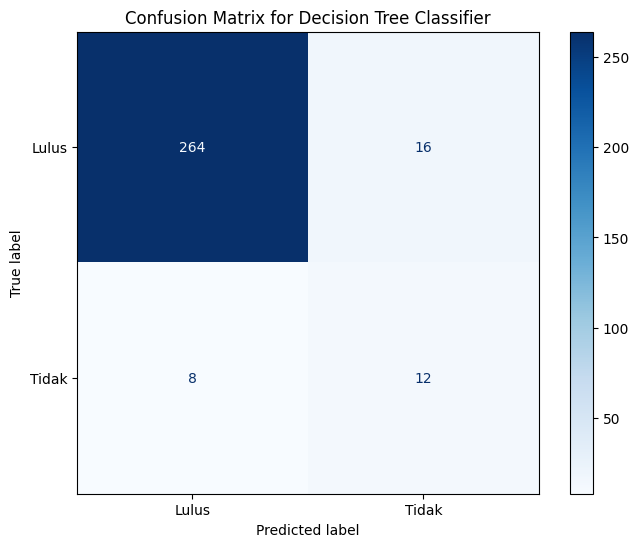

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class names from the label encoder
class_names = ['Lulus', 'Tidak'] # Based on label mapping: ['Lulus', 'Tidak'] [0 1]

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Add title
ax.set_title('Confusion Matrix for Decision Tree Classifier')

# Display the plot
plt.show()


## Visualisasi Decision Tree

### Subtask:
Membuat dan memvisualisasikan pohon keputusan yang telah dilatih. Pastikan untuk menyertakan label fitur dan kelas untuk memudahkan interpretasi.


**Reasoning**:
To visualize the decision tree, I will import the `plot_tree` function, set up the figure size for readability, and then use `plot_tree` with the trained model, feature names, class names, and display options like `filled` and `rounded`. Finally, I will add a title and display the plot.



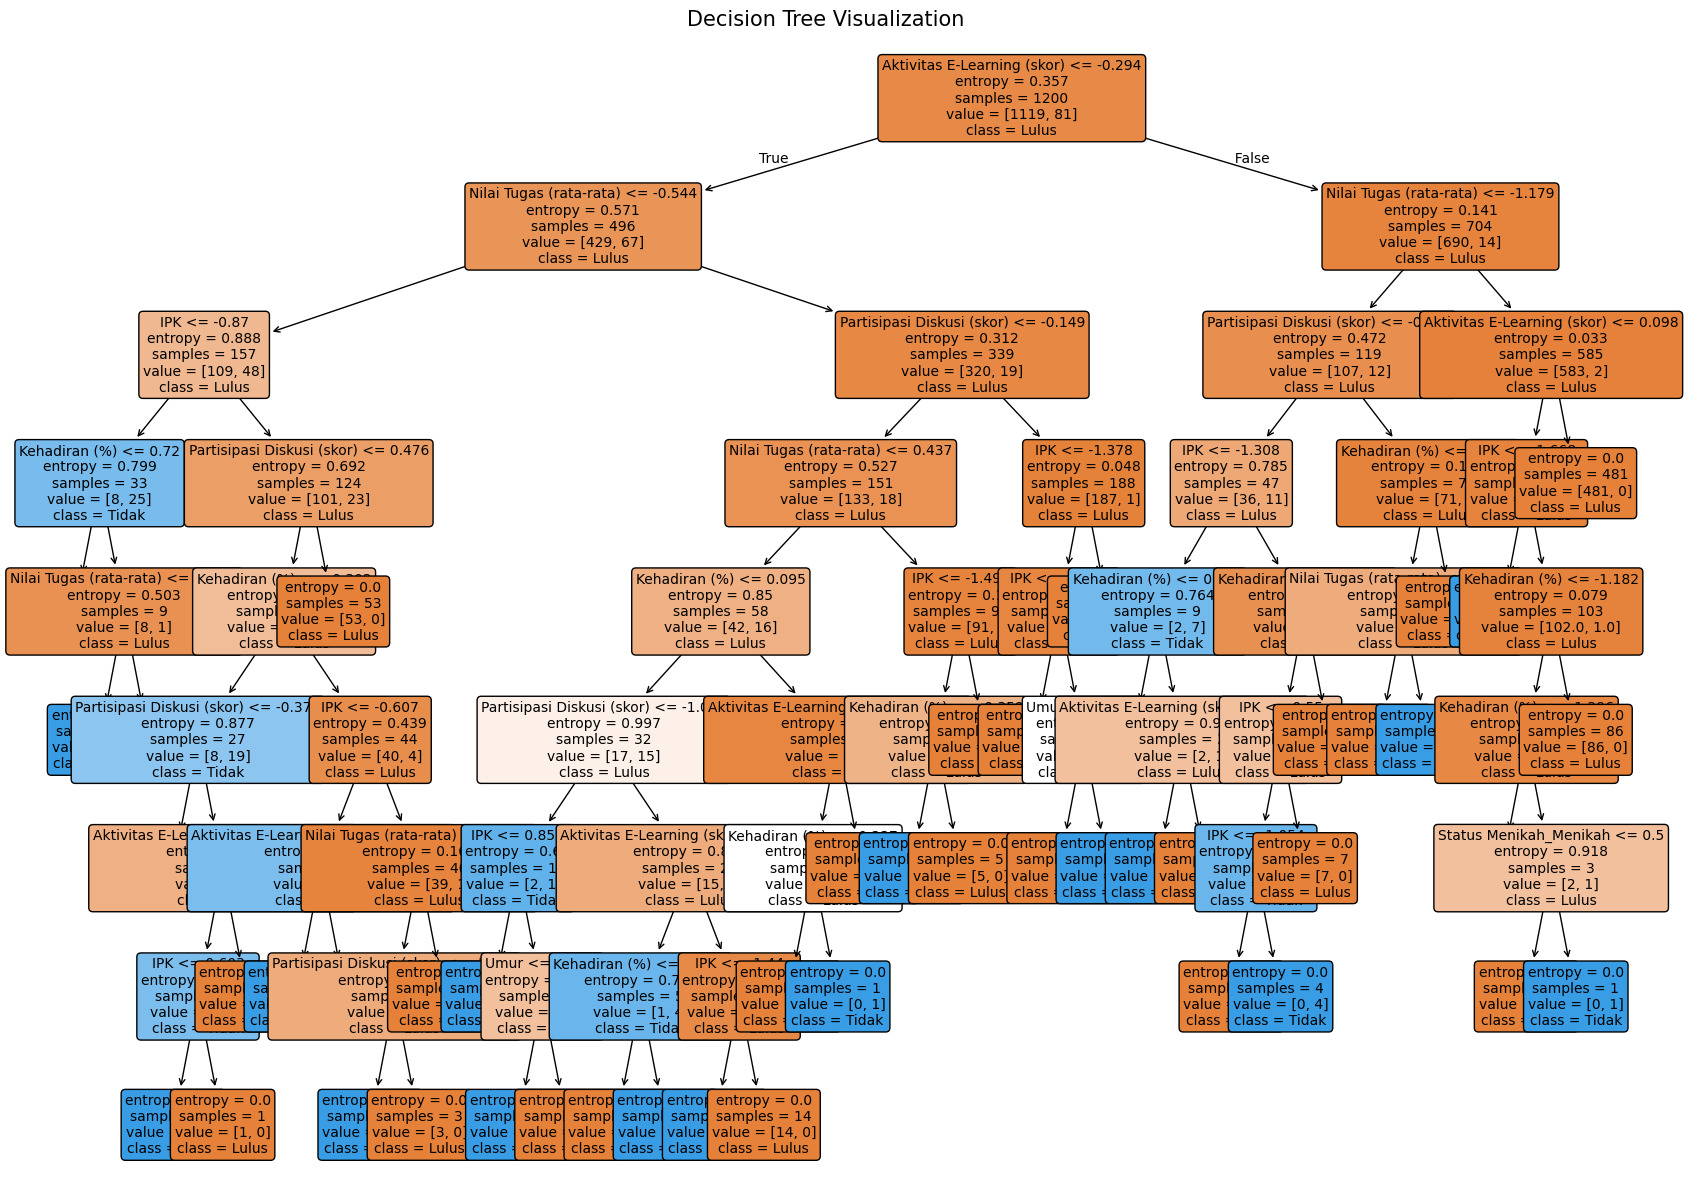

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set the figure size to ensure the tree is readable
plt.figure(figsize=(20, 15))

# Visualize the Decision Tree
plot_tree(dtree_model,
          feature_names=X_train.columns,
          class_names=['Lulus', 'Tidak'], # Use the actual class names from label encoding
          filled=True,
          rounded=True,
          fontsize=10)

plt.title('Decision Tree Visualization', fontsize=15)
plt.show()

## Final Task

### Subtask:
Menyajikan ringkasan hasil analisis, preprocessing, pelatihan model C4.5, dan interpretasi visualisasi.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The dataset `/content/Dataset_Mahasiswa_Kehadiran_Aktivitas_IPK.csv` contains 1500 entries and 10 columns.
*   **Missing Values**: No missing values were found in any column, indicating a complete dataset.
*   **Data Types**: The dataset consists of 1 float64 column, 5 int64 columns, and 4 object columns.
*   **Target Variable Distribution**: The target variable, 'Status Akademik', shows a significant class imbalance with 1399 instances of 'Lulus' (approximately 93.27\%) and 101 instances of 'Tidak' (approximately 6.73\%).
*   **Preprocessing Steps**:
    *   The 'Nama' column was dropped.
    *   Categorical features 'Jenis Kelamin' and 'Status Menikah' were one-hot encoded.
    *   The target variable 'Status Akademik' was label encoded, mapping 'Lulus' to 0 and 'Tidak' to 1.
    *   Numerical features ('Umur', 'Kehadiran (%)', 'Partisipasi Diskusi (skor)', 'Nilai Tugas (rata-rata)', 'Aktivitas E-Learning (skor)', 'IPK') were scaled using `StandardScaler`.
*   **Data Split**: The preprocessed data was split into training (80\%, 1200 samples) and testing (20\%, 300 samples) sets using stratified sampling to maintain the original class distribution.
*   **Model Training**: A C4.5 Decision Tree classifier (`DecisionTreeClassifier` with `criterion='entropy'`) was successfully trained on the preprocessed training data.
*   **Model Evaluation**:
    *   Accuracy: 0.9200
    *   Precision: 0.4286
    *   Recall: 0.6000
    *   F1-score: 0.5000
*   **Visualizations**: A Confusion Matrix and a Decision Tree visualization were successfully generated to interpret the model's performance and decision-making process.

### Insights or Next Steps

*   **Address Class Imbalance**: Given the significant imbalance in the target variable (93.27\% 'Lulus' vs. 6.73\% 'Tidak'), the model's performance metrics (especially Precision and F1-score for the minority class) could be improved by employing techniques like oversampling (e.g., SMOTE), undersampling, or using algorithms robust to imbalance.
*   **Hyperparameter Tuning and Model Comparison**: Further optimize the C4.5 Decision Tree model by performing hyperparameter tuning (e.g., `max_depth`, `min_samples_leaf`) and consider exploring other classification algorithms or ensemble methods to potentially achieve better overall performance, particularly for the minority class.
